In [56]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML

def hyperplane(x,y,a,b,c,d):
    return -a/d - b/d * x - c/d * y

def kartesianIntoPolar(vectorList):
    newVectorList = []
    for vec in vectorList:
        x = vec[0]
        y = vec[1]
        radius = np.sqrt( x**2 + y**2 )
        if x==0 and y>0:
            angle = np.pi/2
        if x==0 and y<0:
            angle = 3/2 * np.pi
        if x>0 and y>=0:
            angle = np.arctan(y/x)
        if x>0 and y<0:
            angle = 2 * np.pi + np.arctan(y/x)
        if x<0:
            angle = np.pi + np.arctan(y/x)
        newVectorList.append([radius, angle, vec[2]])
    return newVectorList

def vectorListIntoWeight(vectorList):
    # vectorslist -> list of np-arrays of weight-vectors
    newVectorList = []
    for vec in vectorList:
        newVectorList.append(np.array([[1]] + [[i] for i in vec]))
    return newVectorList

def plotIn3D(vectorsPositive,vectorsNegative,spaceName,ax1, ax2, ax3,colorPos,colorNeg):
    xValues = [xValue[0] for xValue in (vectorsPositive + vectorsNegative)]
    yValues = [yValue[1] for yValue in (vectorsPositive + vectorsNegative)]
    zValues = [zValue[2] for zValue in (vectorsPositive + vectorsNegative)]

    xmin = min(xValues) - 0.5
    xmax = max(xValues) + 0.5
    ymin = min(yValues) - 0.5
    ymax = max(yValues) + 0.5
    zmin = min(zValues) - 0.5
    zmax = max(zValues) + 0.5

    ax = plt.axes(projection="3d")

    plt.title(spaceName)
    xLabel = ax.set_xlabel(ax1)
    yLabel = ax.set_ylabel(ax2)
    zLabel = ax.set_zlabel(ax3)


    for vec in vectorsPositive:
        ax.scatter(vec[0],vec[1],vec[2], color=colorPos)
    for vec in vectorsNegative:
        ax.scatter(vec[0],vec[1],vec[2], color=colorNeg)

    plt.show()
    return None

In [57]:
# enter vectors in euclidean space
vectorsPositive = [
    [-1, -1, 3],
    [1, 0, 3],
    [2, 0, 3]
]

vectorsNegative = [
    [-1, 3, 3],
    [3, -1, 3],
    [0, -5, 3]
]

initialWeight = [
    [1,0,0,0]
]


# transform vectors to weight (why on earth should you do that?)
vecPos, vecNeg = vectorListIntoWeight(vectorsPositive), vectorListIntoWeight(vectorsNegative)

initialWeight = np.array([[i] for i in initialWeight[0]])

#print("Vectors with positive classification")
#for vec in vecPos:
#    print(vec, "\n")
#print("Vectors with negative classification")
#for vec in vecNeg:
#    print(vec, "\n")

<IPython.core.display.Javascript object>


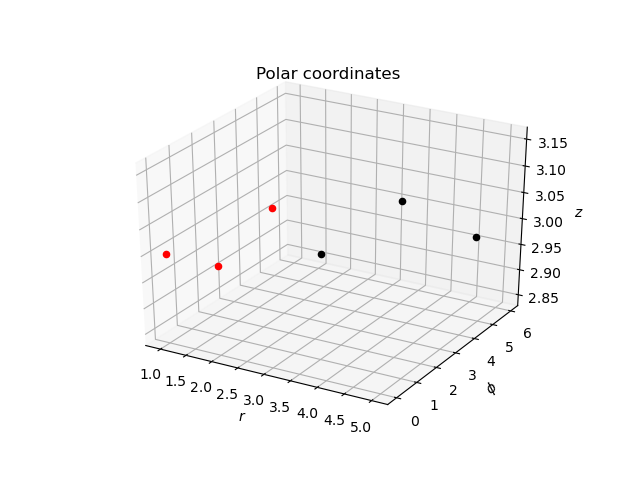

In [62]:
# plot vectors in euclidean space

%matplotlib notebook
#%matplotlib inline
plotIn3D(vectorsPositive,vectorsNegative,"Euclidean space",'$x_1$','$x_2$','$x_3$',"red","black")

In [64]:
# transform to polar coordinates

vectorsPositivePolar = kartesianIntoPolar(vectorsPositive)

vectorsNegativePolar = kartesianIntoPolar(vectorsNegative)

print("Polar coordinates")

print("---> Positive vectors:")
for vec in (vectorsPositivePolar):
    print(vec)
    
print("---> Positive vectors:")
for vec in (vectorsNegativePolar):
    print(vec)

Polar coordinates
---> Positive vectors:
[1.4142135623730951, 3.9269908169872414, 3]
[1.0, 0.0, 3]
[2.0, 0.0, 3]
---> Positive vectors:
[3.1622776601683795, 1.8925468811915387, 3]
[3.1622776601683795, 5.961434752782944, 3]
[5.0, 4.71238898038469, 3]


<IPython.core.display.Javascript object>


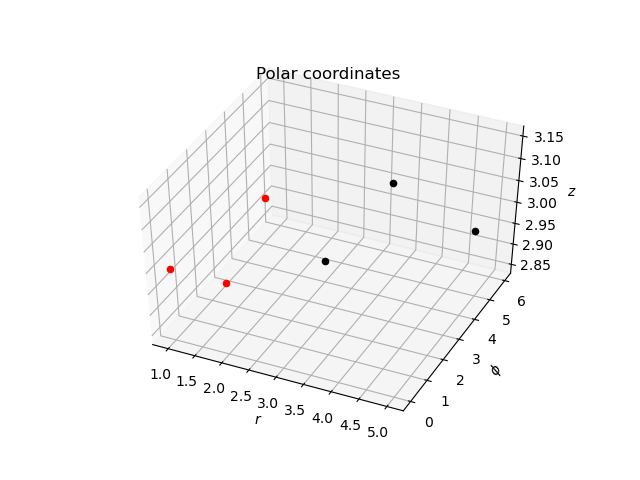

In [66]:
plotIn3D(vectorsPositivePolar,vectorsNegativePolar,"Polar coordinates",'$r$','$\phi$','$z$',"red","black")

In [6]:
###### ###### ###### ######
# for different initial weight uncomment

#initialWeight = [
#    [1,0,0,0]
#]

#initialWeight = np.array([[i] for i in initialWeight[0]])

###### ###### ###### ######

In [67]:
# perceptron algorithm

aPos, aNeg = vectorListIntoWeight(vectorsPositivePolar), vectorListIntoWeight(vectorsNegativePolar)

# perceptron output
ergPos, ergNeg = [], []

for vec in aPos:
    ergPos.append(np.sum(initialWeight*vec))

for vec in aNeg:
    ergNeg.append(np.sum(initialWeight*vec))

weightAdjusted = initialWeight
# stores weight for animation
weightStored = []
weightStored.append(initialWeight)

countAngleAdjustment = 0

while (any(i<0 for i in ergPos) or any(i>=0 for i in ergNeg)):
    for i in range(len(ergPos)):
        ergPos[i] = np.sum(weightAdjusted*aPos[i])
        if ergPos[i] < 0:
            weightAdjusted = weightAdjusted + aPos[i]
            weightAdjusted[2][0] = weightAdjusted[2][0] % (2*np.pi) # adjust angle
            #countAngleAdjustment += 1
            weightStored.append(weightAdjusted)
    for i in range(len(ergNeg)):
        ergNeg[i] = np.sum(weightAdjusted*aNeg[i])
        if ergNeg[i] >= 0:
            weightAdjusted = weightAdjusted - aNeg[i]
            weightAdjusted[2][0] = weightAdjusted[2][0] % (2*np.pi) # adjust angle
            #countAngleAdjustment += 1
            weightStored.append(weightAdjusted)

print("The solution is:\n", weightAdjusted)

#print("The radius was adjusted by ", countAngleAdjustment, " times." )

The solution is:
 [[  4.        ]
 [-15.28118246]
 [  2.8198421 ]
 [  9.        ]]


<IPython.core.display.Javascript object>


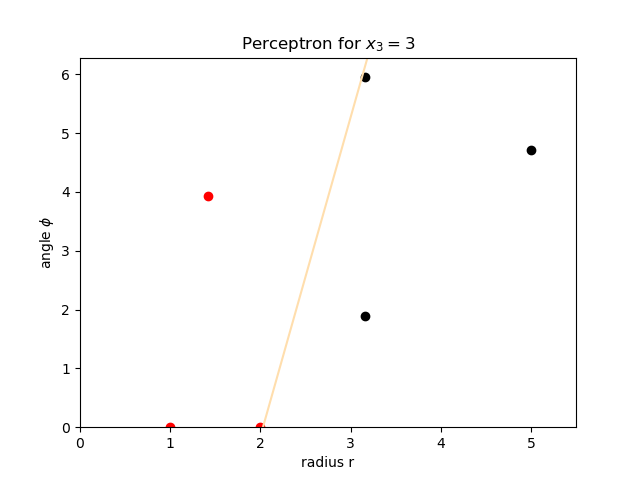

In [68]:
# plot 2D hyperplane

xValues = [xValue[0] for xValue in (vectorsPositivePolar + vectorsNegativePolar)]

xmin = 0
xmax = max(xValues) + 0.5
ymin = 0
ymax = 2*np.pi

x = np.arange(0,2*np.pi) 
y = - (weightAdjusted[0][0]+3*weightAdjusted[3][0])/weightAdjusted[2][0]-weightAdjusted[1][0]/weightAdjusted[2][0] * x
plt.title("Perceptron for $x_3=3$") 
plt.xlabel("radius r") 
plt.ylabel("angle $\phi$")
#plt.subplot(2, 1, 1)
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

for vec in vectorsPositivePolar:
    plt.scatter(vec[0],vec[1], color="red")
for vec in vectorsNegativePolar:
    plt.scatter(vec[0],vec[1], color="black")

plt.plot(x,y, color="navajowhite") 
plt.show()

<IPython.core.display.Javascript object>


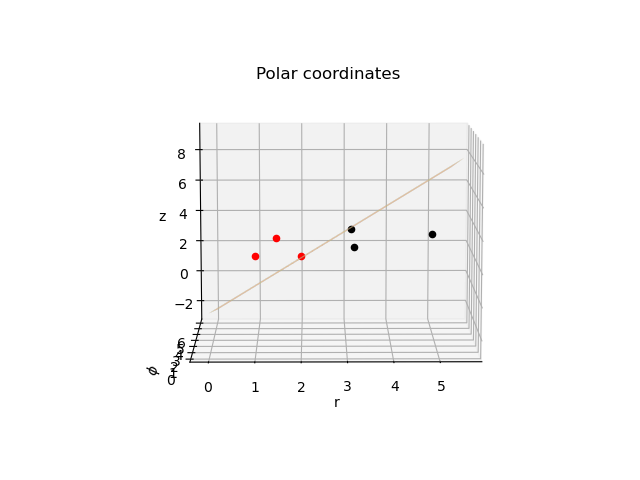

In [70]:
xValues = [xValue[0] for xValue in (vectorsPositivePolar + vectorsNegativePolar)]
yValues = [yValue[1] for yValue in (vectorsPositivePolar + vectorsNegativePolar)]
zValues = [zValue[2] for zValue in (vectorsPositivePolar + vectorsNegativePolar)]

xmin = 0
xmax = max(xValues) + 0.5
ymin = 0
ymax = 2*np.pi
#zmin = min(zValues) - 3
#zmax = max(zValues) + 3

x = np.linspace(xmin, xmax, 50)
y = np.linspace(ymin, ymax, 50)

X, Y = np.meshgrid(x, y)

Z = hyperplane(X,Y,weightAdjusted[0][0],weightAdjusted[1][0],weightAdjusted[2][0],weightAdjusted[3][0])

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, color='navajowhite')

for vec in vectorsPositivePolar:
    ax.scatter(vec[0],vec[1],vec[2], color="red")
for vec in vectorsNegativePolar:
    ax.scatter(vec[0],vec[1],vec[2], color="black")

plt.title("Polar coordinates")
xLabel = ax.set_xlabel("r")
yLabel = ax.set_ylabel("$\phi$")
zLabel = ax.set_zlabel("z")

plt.show()

<ipython-input-72-c797c6b607b9>:18: RuntimeWarning: divide by zero encountered in long_scalars
  y = -( vec[0][0] + 3 * vec[3][0] ) / vec[2][0] - vec[1][0] / vec[2][0] * x
<ipython-input-72-c797c6b607b9>:18: RuntimeWarning: invalid value encountered in long_scalars
  y = -( vec[0][0] + 3 * vec[3][0] ) / vec[2][0] - vec[1][0] / vec[2][0] * x


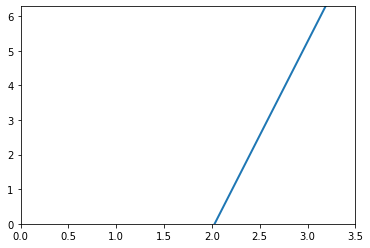

In [72]:
%matplotlib inline

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0,xmax,100)
    #y = x * np.heaviside(i-x, 1)
    
    #x = np.linspace(0,3, 100)
    #x = np.array(x)
    #y = x
    #x = x[:i]
    #y = y[:i]
    
    vec = weightStored[i]
    y = -( vec[0][0] + 3 * vec[3][0] ) / vec[2][0] - vec[1][0] / vec[2][0] * x
    
    line.set_data(x, y)
    return (line,)

fig, ax = plt.subplots()

xmax = max([xValue[0] for xValue in (vectorsPositive + vectorsNegative)]) + 0.5

ax.set_xlim((0, xmax))
ax.set_ylim((0, 2*np.pi))

line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(weightStored), interval=500, blit=True)

HTML(anim.to_html5_video())